# Assignment 1 - Introduction to Python for Data Science Program
##### **Nama: Ika Nurfitriani**
##### **Kode Peserta: PYTN-KS10-008**

# Short Description of The Assignment
This assignment is a project intended as the first assignment in a self-study class at PT Hacktivate Teknologi Indonesia. In this project, we will analyze the London Crime LSOA data from January 2008 - December 2016. Students are asked to formulate questions, then answer them by visualizing the data and drawing conclusions from the overall analysis that has been made. This assignment is made by taking into account all the assessment rubrics that have been set and will be checked by the teacher of each class.

# Dataset Description
The dataset represented by this london_crime_by_lsoa.csv file includes the number of criminal reports by month, LSOA region, and major/minor category from Jan 2008 to Dec 2016 in Greater London (central London and surrounding metropolitan area). This data consists of 13490604 rows of data with 7 columns. This dataset was obtained and downloaded from Kaggle.com.

There are 7 columns with a description of each column as follows:
- lsoa_code: this represents the police area
- boroughs: boroughs/regions of london with related statistics
- major_category: main crime category
- minor_category: minor crime category
- value: the number of crimes for a certain area, in a certain month
- year: year summary statistics
- month: month summary statistics

# A. Install Required Libraries
***
Pada tahap ini, akan saya lewatkan karena library yang dibutuhkan sudah terinstall. Adanya bagian ini ditujukan untuk orang awam atau pemula yang belum mengenal data science menggunakan Python.

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install wordcloud
!pip install folium

# B. Import Required Libraries
***
Pada tahap ini, saya akan mengimport library yang dibutuhkan.

In [1]:
# Untuk memproses data
import numpy as np
import pandas as pd

# Untuk keperluan plotting
import seaborn as sns
import matplotlib as mpl
mpl.style.use(['ggplot'])
import matplotlib.pyplot as plt
%matplotlib inline

# Untuk membuat wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Untuk membuat peta
import folium

# C. Preprocessing Dataset Sebelum Visualisasi
***
Di tahap ini data dalam dataset akan melalui berbagai proses untuk memastikan bahwa data siap digunakan untuk visualisasi.

## 1. Membaca dataset
Pada bagian ini, semua nilai dalam list missing values akan diubah menjadi bentuk Standard Missing Values.

In [2]:
# Mendeteksi macam-macam format non standard missing values
miss_values = ['NA', 'na', 'n/a', "--", "?"]

# Membaca dataset
df_locb = pd.read_csv('./dataset/london_crime_by_lsoa.csv', na_values=miss_values)

# Melihat 10 data pertama dari dataset
df_locb.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [3]:
# Melihat 10 data terakhir dari dataset
df_locb.tail(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490594,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2008,2
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


## 2. Mengganti nama kolom dan melihat beberapa informasi dataset
Pada bagian ini, nama masing-masing kolom akan diganti untuk mewakili isi dari masing-masing kolom dan melihat beberapa informasi dataset.

In [4]:
# Mengganti nama kolom
df_locb = df_locb.rename(
    columns={
        'lsoa_code': 'Code Area',
        'borough': 'Borough',
        'major_category': 'Major Category',
        'minor_category': 'Minor Category',
        'value': 'Number of Crimes',
        'year': 'Year',
        'month': 'Month'
    },
)

# Melihat 5 data pertama dari dataset untuk mengecek kembali kolom
df_locb.head()

,Code Area,Borough,Major Category,Minor Category,Number of Crimes,Year,Month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
# Melihat informasi tentang dataset
df_locb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Code Area         object
 1   Borough           object
 2   Major Category    object
 3   Minor Category    object
 4   Number of Crimes  int64 
 5   Year              int64 
 6   Month             int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
# Melihat ringkasan singkat dari setiap kolom dalam kerangka data kita
df_locb.describe()

,Number of Crimes,Year,Month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [7]:
# Melihat transpose ringkasan singkat dari setiap kolom dalam kerangka data kita
df_locb.describe(include= 'O').transpose()

,count,unique,top,freq
Code Area,13490604,4835,E01003689,3456
Borough,13490604,33,Croydon,602100
Major Category,13490604,9,Theft and Handling,3966300
Minor Category,13490604,32,Common Assault,522180


In [8]:
# Melihat informasi dimensi data
rows, columns = df_locb.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
13490604 baris
7 kolom


In [9]:
# Melihat range index dataset
df_locb.index

RangeIndex(start=0, stop=13490604, step=1)

In [10]:
# Melihat daftar indeks dataset
df_locb.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [11]:
# Melihat value isi data kolom borough
df_locb['Borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [12]:
# Melihat daftar kolom yang ada dalam dataset
columns = df_locb.columns
print(columns)

Index(['Code Area', 'Borough', 'Major Category', 'Minor Category',
       'Number of Crimes', 'Year', 'Month'],
      dtype='object')


In [13]:
# Melihat data yang unik
df_locb.nunique()

Code Area           4835
Borough               33
Major Category         9
Minor Category        32
Number of Crimes     247
Year                   9
Month                 12
dtype: int64

In [14]:
# Melihat nilai unik kolom Number of Crimes
print("Nilai Unik Dalam Kolom Number of Crimes:", df_locb['Number of Crimes'].unique())

Nilai Unik Dalam Kolom Number of Crimes: [  0   1   2   3   4   9   5   6   7  10  18  11  16   8  72  12  53  14
  19  15  17  20  43  50  37  57  21  13  80  25  28  22  58  33  29  38
  88  23 111  40  39  60  26  48  32  66 122  47  30 118  75  54  51  67
  45  35  24 117  27  68  99  65  84  34  55  81 112 119  71 113  36  61
  46  31  59  44 149  49 241 104  69  77  41  64  42 167  73  74 165 107
  86  52  63  79 103 106  70  90  91 148 130  62 136  98  92 141  78  82
  56 194 168 152 204 114 153 116 157 131 120  96 101  97  95 309 142  87
 146 195  93 166 144  94 161 135 170  76 127 210  83 150 186 156 124  85
 174 221 163 109 110  89 115 138 140 121 139 105 129 177 237 235 226 199
 240 189 280 100 102 288 134 244 211 158 187 137 123 164 108 224 201 233
 132 220 126 154 133 257 178 214 147 229 176 202 230 155 162 160 203 248
 215 172 192 208 232 197 173 216 205 180 151 184 179 243 188 228 159 254
 267 247 196 181 193 260 169 281 212 183 128 217 143 239 200 249 125 253
 145 185 1

### KESIMPULAN ANALISIS
***
Dari analisis di atas, terdapat informasi dua tipe data yang digunakan yaitu String dan Integer. Dimana tipe data String digunakan untuk kolom Code Area, Borough, Major Category dan Minor Category sedangkan Integer untuk kolom Number of Crime, Year dan Month. Lalu terdapat informasi daftar kolom yang ada pada dataset diantaranya kolom Code Area, Borough, Major Category, Minor Category, Number of Crimes, Year dan Month.

## 3. Mengecek Missing Values dan Duplicated Data
Di bagian ini akan dilakukan pengecekkan Standard Missing Values dan Unstandard Missing Values dan Duplicated Data

In [15]:
# Cek Missing Values
df_locb.isnull().sum()

Code Area           0
Borough             0
Major Category      0
Minor Category      0
Number of Crimes    0
Year                0
Month               0
dtype: int64

In [16]:
# Cek Jumlah Seluruh Missing Values
print("Jumlah dari Keseluruhan Missing Values adalah", df_locb.isnull().sum().sum())

Jumlah dari Keseluruhan Missing Values adalah 0


In [17]:
# Cek Duplicated Data
print("Jumlah Duplicated Data adalah", df_locb.duplicated().sum())

Jumlah Duplicated Data adalah 0


### KESIMPULAN ANALISIS
***
Dari analisis di atas, tidak terdapat Standard Missing Values ataupun Unstandard Missing Values pada dataset dan tidak terdapat Duplicated Data. Maka dapat dipastikan jika data tersebut sudah bersih dan siap dilakukan visualisasi data.

# D. Visualisasi Data
Pada tahap ini karena data dalam dataset sudah dilakukan preprocessing, maka akan dilakukan visualisasi data.

## 1. Area Plot

Pada bagian ini akan melakukan visualisasi data yang ditanyakan dalam Question menggunakan Area Plot.

**Question**:

Bagaimana perbandingan 3 kejahatan mayor yang menyumbang total kasus kejahatan tertinggi di London dari tahun 2008 - 2016?

**Answer Question:**

In [18]:
# Membuat list tahun untuk Year
tahun = np.sort(df_locb['Year'].unique())

# Membuat list majcat untuk Major Category
majcat = df_locb['Major Category'].unique()

# Membuat list wilayah untuk Borough 
wilayah = df_locb['Borough'].unique()

# Membuat data untuk dataframe baru
isi = {}
for year in tahun:
    # Mengambil semua data pada tahun = 'year', grouping berdasarkan 'Major Category', summing 'Number of Crimes'
    majcat_per_tahun = df_locb[
        df_locb['Year'] == year
    ].groupby('Major Category')['Number of Crimes'].sum()
    
    # Membuat Series untuk dataframe baru
    isi[year] = pd.Series(
        data=map(int, majcat_per_tahun.reset_index()['Number of Crimes'].values),
        index=majcat_per_tahun.index
    )

# Membuat dataframe baru dengan Major Category sebagai index dan Years sebagai columns
df_majcat_years = pd.DataFrame(
    columns=tahun,
    index=majcat,
    data=isi
)

# Menambahkan kolom Total
df_majcat_years['Total'] = df_majcat_years[tahun].sum(axis=1)

# Data diurutkan berdasarkan Total dari tertinggi ke terendah
df_majcat_years.sort_values(by='Total', ascending=False, inplace=True)

# Tampilkan data
df_majcat_years

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273


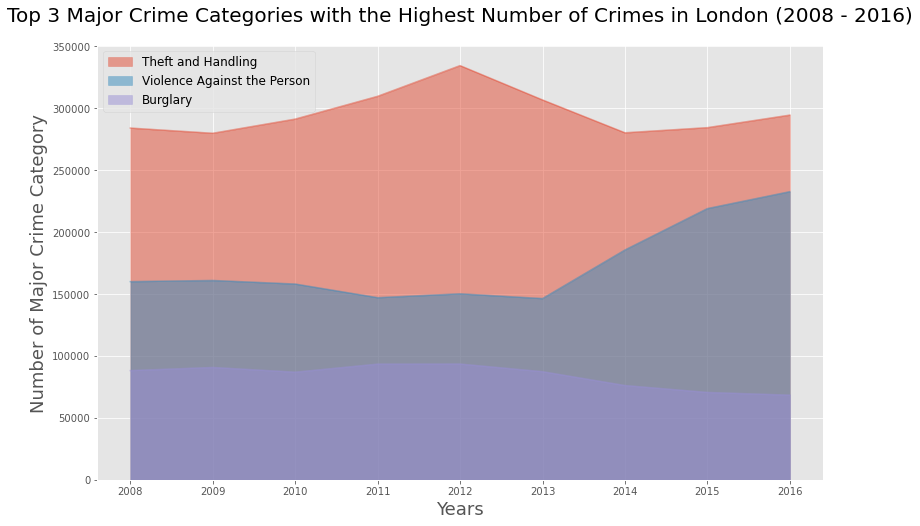

In [19]:
# Membuat dataframe baru dengan mengambil 3 data teratas yang total kasus kejahatannya tertinggi lalu transpose
df_area = df_majcat_years[:3][tahun].transpose()
df_area.plot(
    kind='area',
    stacked=False,
    figsize=(13,8),
)

# Memberikan keterangan pada chart
plt.title('Top 3 Major Crime Categories with the Highest Number of Crimes in London (2008 - 2016)', fontsize=20, y=1.04)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of Major Crime Category', fontsize=18)
plt.legend(loc='upper left', fontsize=12)

# Tampilkan area plot
plt.show()

### Kesimpulan/Analisis Jawaban
***
Plot area di atas menunjukkan 3 kategori kejahatan mayor yang menyumbang total kasus kejahatan tertinggi di London dari tahun 2008 - 2016. Berikut beberapa informasi yang didapat dari plot area di atas:

1. Pada tahun 2012, kasus 'Theft and Handling' meningkat lalu menurun dari tahun 2012 - 2014 dan kembali meningkat tahun 2014 - 2016. Lalu pada kasus 'Violence Againts the Person' menurun dari tahun 2008 - 2012 tetapi dari tahun 2013 - 2016 meningkat. Sedangkan pada kasus 'Burglary' total kasus tiap tahunnya hampir mirip karena totalnya antara **50000 - 100000** kasus.
2. Dari ketiga kategori kejahatan mayor tersebut, 'Theft and Handling' menyumbang paling banyak terhadap total kasus kejahatan yang terjadi di London yang ditandai dengan grafik paling tinggi. Disusul oleh kategori 'Violence Against the Person' kemudian kategori 'Burglary'.

## 2. Histogram

Pada bagian ini akan melakukan visualisasi data yang ditanyakan dalam Question menggunakan Histogram.

**Question**:

Bagaimana representasi grafis dari total kasus kejahatan yang terjadi untuk setiap wilayah di Kota London pada tahun 2012?

**Answer Question:**

In [20]:

# Membuat isi data untuk dataframe baru
isi = {}
for year in tahun:
    # Mengambil semua data pada tahun = 'year', grouping berdasarkan 'Borough', summing 'Number of Crimes'
    wilayah_per_tahun = df_locb[
        df_locb['Year'] == year
    ].groupby('Borough')['Number of Crimes'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    isi[year] = pd.Series(
        data=map(int, wilayah_per_tahun.reset_index()['Number of Crimes'].values),
        index=wilayah_per_tahun.index
    )

# Membuat dataframe dengan 'Wilayah' sebagai index dan years sebagai columns
df_borough_years = pd.DataFrame(
    columns=tahun,
    index=wilayah,
    data=isi
)
df_borough_years['Total'] = df_borough_years[tahun].sum(axis=1)

# Urutkan data berdasarkan 'Total' dari tertinggi ke terendah
df_borough_years.sort_values(by='Total', ascending=False, inplace=True)

# Tampilkan 5 data teratas
df_borough_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


In [21]:
# Menyimpan data tahun 2012
df_locb_2012 = df_borough_years[2012]

# Numpy
count, bin_edges = np.histogram(df_locb_2012, bins=10)
print(count)
print(bin_edges)

[ 1  4  4 12  6  5  0  0  0  1]
[  157.   6063.9 11970.8 17877.7 23784.6 29691.5 35598.4 41505.3 47412.2
 53319.1 59226. ]


Text(0, 0.5, 'Number of Borough')

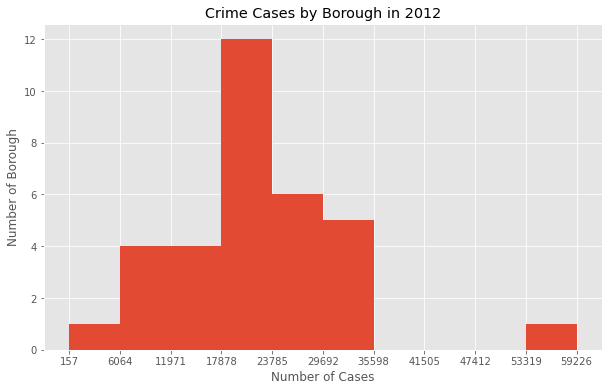

In [22]:
# Membuat histogram dari data total Kasus Kejahatan tahun 2012
df_locb_2012.plot(kind='hist',
             bins=10,
             xticks=bin_edges,
             figsize=(10,6))

# Memberikan keterangan pada chart
plt.title("Crime Cases by Borough in 2012")
plt.xlabel("Number of Cases")
plt.ylabel("Number of Borough")

### Kesimpulan/Analisis Jawaban
***
Dari histogram di atas, diketahui bahwa terdapat 12 jumlah wilayah dengan jumlah kasus antara **17878 - 23785** kasus dimana jumlah wilayah ini merupakan yang tertinggi. Kemudian terdapat 1 wilayah dengan jumlah kasus terendah antara **157 - 6064** kasus dan terdapat 1 wilayah juga dengan jumlah kasus tertinggi antara **53319 - 59226** kasus.

## 3. Bar Chart

Pada bagian ini akan melakukan visualisasi data yang ditanyakan dalam Question menggunakan Bar Chart.

**Question**:

1. Berapa Jumlah Kasus Kejahatan pada setiap Major Category di Wilayah London dari Tahun 2008 - 2016?
2. Berapa Jumlah Kasus Kejahatan pada setiap Minor Category di Wilayah London dari Tahun 2008 - 2016?

**Answer Question Number 1:**

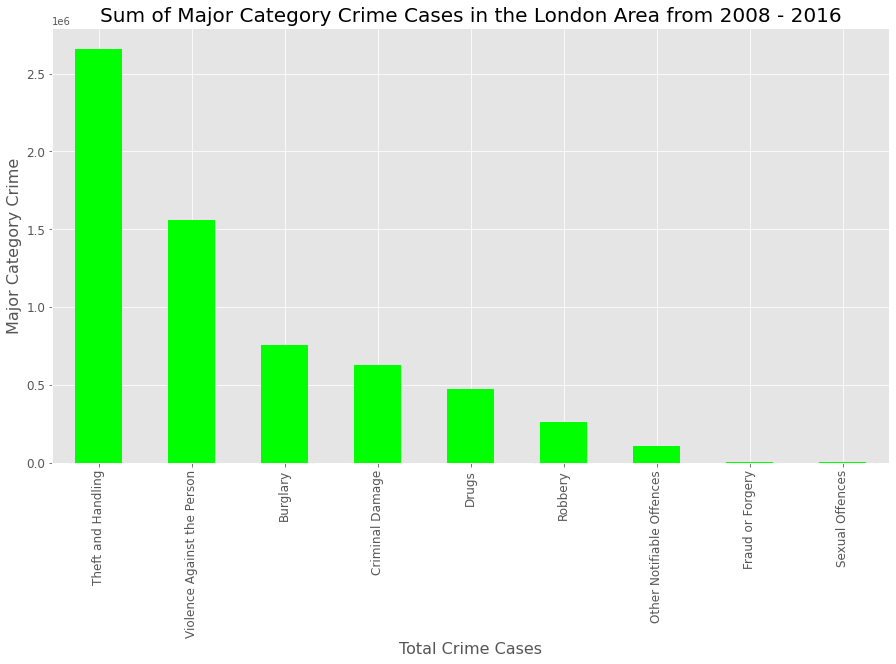

In [23]:
# Membuat vertical bar chart karena data yang ditampilkan tidak banyak
df_majcat_years['Total'].plot(kind="bar", figsize=(15,8), color='lime')

# Memberikan keterangan pada chart
plt.title("Sum of Major Category Crime Cases in the London Area from 2008 - 2016", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Total Crime Cases', fontsize=16)
plt.ylabel('Major Category Crime', fontsize=16)

# Tampilkan bar chart
plt.show()

**Answer Question Number 2:**

In [24]:
# Membuat dataframe baru untuk Minor Category
df_mincat= df_locb.groupby('Minor Category', axis=0).sum()
df_mincat.sort_values(by='Number of Crimes', ascending=False, inplace=True)
df_mincat

,Number of Crimes,Year,Month
Minor Category,,,
Other Theft,980085,1050626160,3394170
Theft From Motor Vehicle,569956,1050626160,3394170
Burglary in a Dwelling,491282,1049322384,3389958
Harassment,458124,1050408864,3393468
Assault with Injury,451001,1049974272,3392064
Possession Of Drugs,431948,1049756976,3391362
Common Assault,413690,1050626160,3394170
Theft From Shops,345142,838545264,2709018
Other Theft Person,308842,1045193760,3376620


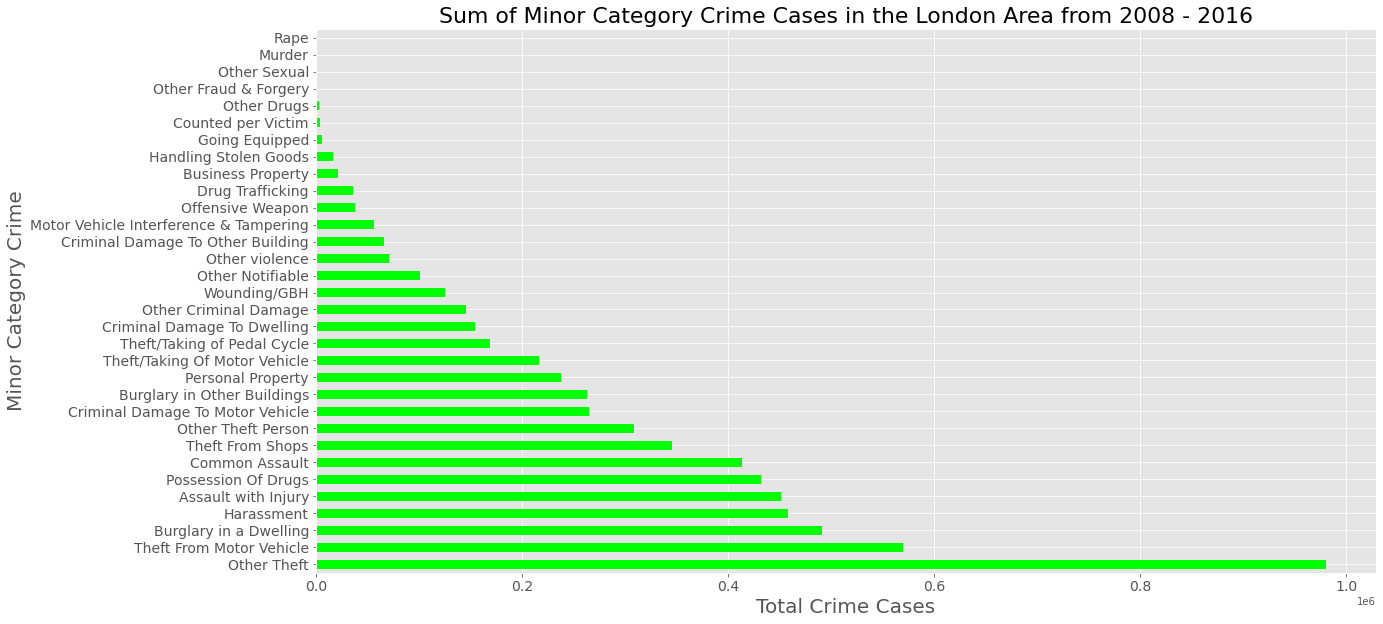

In [25]:
# Membuat horizontal bar chart karena data yang ditampilkan banyak
df_mincat['Number of Crimes'].plot(kind="barh", figsize=(19,10), color='lime')

# Memberikan keterangan pada chart
plt.title("Sum of Minor Category Crime Cases in the London Area from 2008 - 2016", fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Total Crime Cases', fontsize=20)
plt.ylabel('Minor Category Crime', fontsize=20)

# Tampilkan bar chart
plt.show()

### Kesimpulan/Analisis Jawaban
***
Dari bar chart di atas, terlihat dari masing-masing kategori kejahatan terdapat 3 kategori dengan presentase total kasus kejahatan tertinggi tahun 2008 - 2016 yaitu 'Theft and Handling', 'Violence Against the Person' dan 'Burglary' untuk kategori kejahatan mayor dan 'Other Theft', 'Theft From Motor Vehicle' dan 'Burglary in a Dwelling' untuk kategori kejahatan minor.

## 4. Pie Chart

Pada bagian ini akan melakukan visualisasi data yang ditanyakan dalam Question menggunakan Pie Chart.

**Question**:

Berapa Presentase Jumlah Kasus Kejahatan pada Major Category di Wilayah London dari Tahun 2008 - 2016?

**Answer Question:**

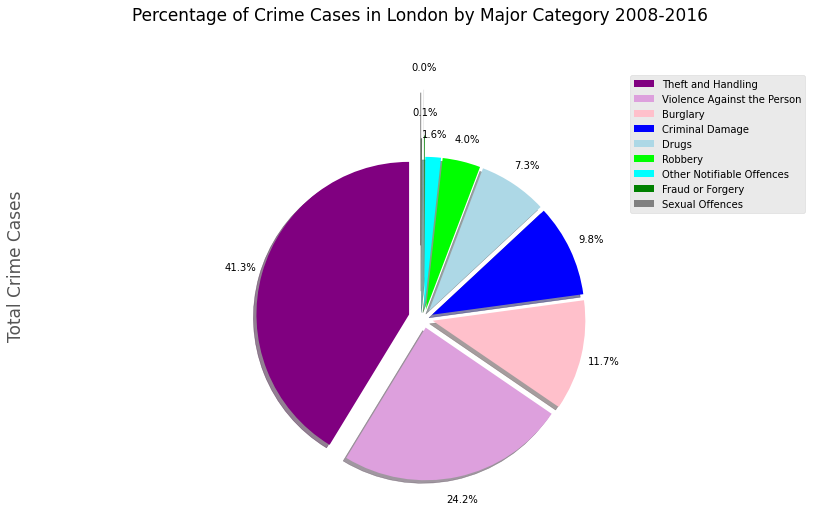

In [26]:
# Menambahkan list explode dan warna
explode_list = [0.1, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.2, 0.5]
colors_list = ['purple', 'plum', 'pink', 'blue',
               'lightblue', 'lime', 'aqua', 'green', 'gray']

# Mulai membuat chart
df_majcat_years['Total'].plot(kind='pie',
                       figsize=(14,8),
                       autopct='%1.1f%%',
                       startangle=90,
                       shadow=True,
                       labels=None,
                       explode=explode_list,
                       colors=colors_list,
                       pctdistance=1.15,
                       )

# Memberikan keterangan pada chart
plt.title('Percentage of Crime Cases in London by Major Category 2008-2016', y=1.1, x=0.5, fontsize=17)
plt.ylabel('Total Crime Cases', fontsize=17, y=0.55)
plt.axis('equal')

# Menambahkan legend untuk keterangan warna yang ada pada chart
plt.legend(labels=df_majcat_years.index.values, loc='upper right')

# Tampilkan pie chart
plt.show()

### Kesimpulan/Analisis Jawaban
***
Pie chart diatas menunjukkan Presentase Jumlah Kasus Kejahatan pada Major Category di Wilayah London dari Tahun 2008 - 2016. Berikut informasi yang didapat dari pie chart di atas:
1. Terdapat 2 kategori dengan presentase jumlah kasus **tertinggi** pada major category. Pada tempat pertama diduduki oleh kategori 'Theft and Handling' dengan persentase **41.3%** lalu di tempat kedua diikuti oleh kategori 'Violence Against the Person' dengan persentase **24.2%**. 
2. Dan terdapat juga 2 kategori dengan presentase jumlah kasus **terendah** pada major category. Pada tempat pertama diduduki oleh kategori 'Sexual Offences' dengan persentase **0.0%** lalu di tempat kedua diikuti oleh kategori 'Fraud or Forgery' dengan persentase **0.1%**.

## 5. Box Plot

Pada bagian ini akan melakukan visualisasi data yang ditanyakan dalam Question menggunakan Box Plot.

**Question**:

1. Bagaimana representasi statistik dari total kasus kejahatan yang terjadi untuk major category dari kategori Theft and Handling dan Violence Against the Person tahun 2008 - 2016?
2. Bagaimana representasi statistik dari total kasus kejahatan yang terjadi pada tahun 2008-2016 dari setiap wilayah di kota London?

**Answer Question 1**:

Text(0, 0.5, 'Total Crime Cases')

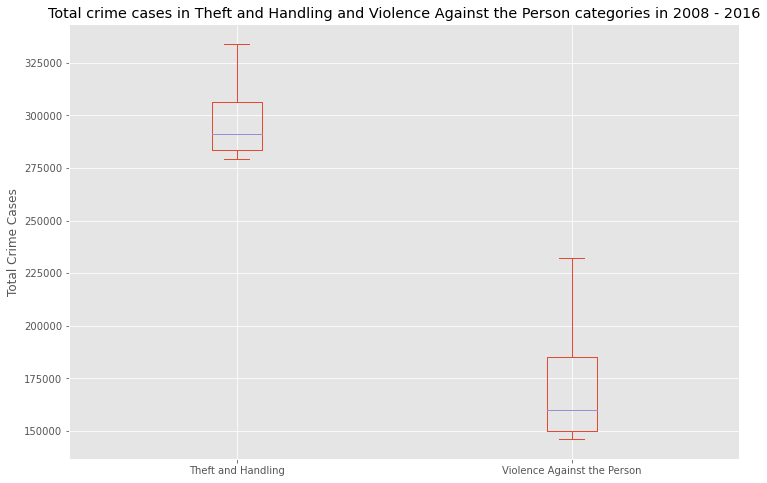

In [27]:
# Membuat dataframe baru
df_box = df_majcat_years.T
df_box = df_box.loc[tahun, ['Theft and Handling', 'Violence Against the Person']]

# Membuat box plot
df_box.plot(kind='box', figsize=(12,8))
plt.title('Total crime cases in Theft and Handling and Violence Against the Person categories in 2008 - 2016')
plt.ylabel('Total Crime Cases')

**Answer Question 2**:

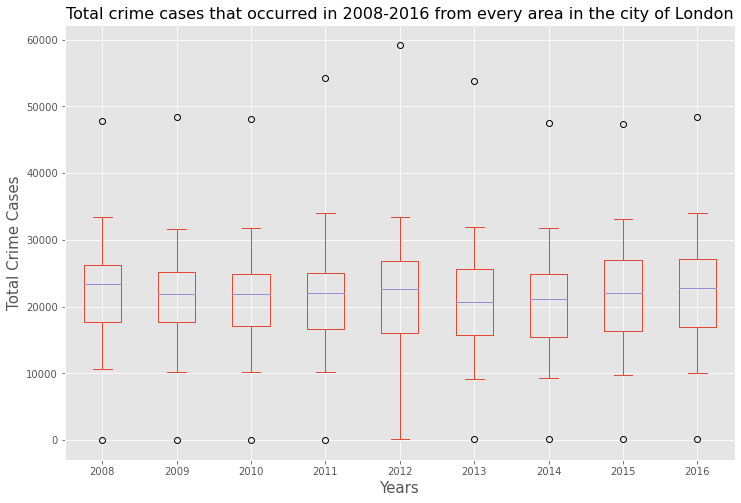

In [28]:
# Membuat box plot
df_borough_years[tahun].plot(kind='box', figsize=(12,8))

# Memberikan keterangan pada chart
plt.xlabel('Years', fontsize=15)
plt.ylabel('Total Crime Cases', fontsize=15)
plt.title('Total crime cases that occurred in 2008-2016 from every area in the city of London',  fontsize=16, y=1)

# Tampilkan box plot
plt.show()

### Kesimpulan/Analisis Jawaban
***
Berikut beberapa informasi yang didapat dari box plot di atas:
1. Pada box plot pertama yang menunjukkan total kasus kejahatan yang terjadi untuk major category dari kategori 'Theft and Handling' dan 'Violence Against the Person' tahun 2008 - 2016, terlihat bahwa range jumlah kasus kejahatan 'Theft and Handling' lebih besar daripada kasus 'Violence Against the Person'. Lalu dari kedua box plot di atas terlihat tidak ada outlier. 
2. Pada box plot kedua yang menunjukkan total kasus kejahatan yang terjadi pada tahun 2008-2016 dari setiap wilayah di kota London, terlihat bahwa range jumlah kasus kejahatan yang terjadi setiap tahunnya memiliki range yang mirip, kecuali 2012 karena lebih tersebar dibandingkan tahun-tahun yang lain. Terlihat juga rata-rata total kasus kejahatan yang terjadi untuk setiap wilayah berada dalam kisaran sekitar **23.000 - 26.000an** kejadian di setiap tahunnya. Lalu dari semua box plot di atas terlihat adanya outlier, outlier ini muncul karena adanya total kasus kejahatan dengan nilai yang ekstrim.

## 6. Scatter Plot

Pada bagian ini akan melakukan visualisasi data yang ditanyakan dalam Question menggunakan Scatter Plot.

**Question**:
1. Bagaimana trend jumlah total kasus kejahatan untuk major category dari kategori Theft and Handling dan Violence Against the Person tahun 2008 - 2016?
2. Bagaimana trend total kasus kejahatan yang terjadi dari tahun 2008 - 2016 di Kota London?

**Answer Question 1**:

In [29]:
# Membuat dataframe baru total kasus kejahatan untuk major category dari kategori Theft and Handling dan Violence Against the Person
df_scap1 = df_majcat_years[:2][tahun].T
df_scap1

,Theft and Handling,Violence Against the Person
2008,283692,159844
2009,279492,160777
2010,290924,157894
2011,309292,146901
2012,334054,150014
2013,306372,146181
2014,279880,185349
2015,284022,218740
2016,294133,232381


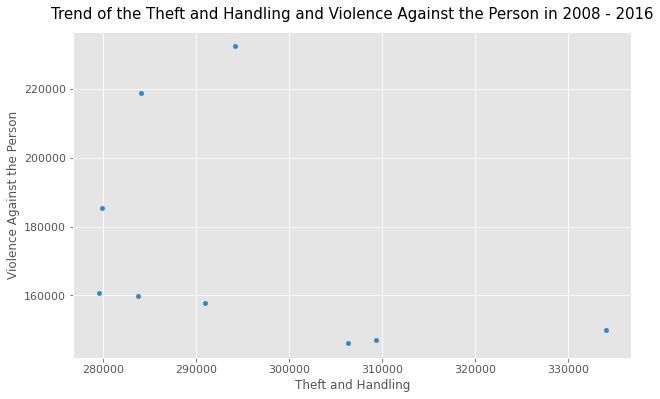

In [30]:
# Membuat scatter plot
df_scap1.plot(kind='scatter', x='Theft and Handling', y='Violence Against the Person', figsize=(10, 6))

# Memberikan keterangan pada chart
plt.title('Trend of the Theft and Handling and Violence Against the Person in 2008 - 2016',  fontsize=15, y=1.02)
plt.xlabel('Theft and Handling', fontsize=12)
plt.ylabel('Violence Against the Person', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Tampilkan scatter plot
plt.show()

**Answer Question 2**:

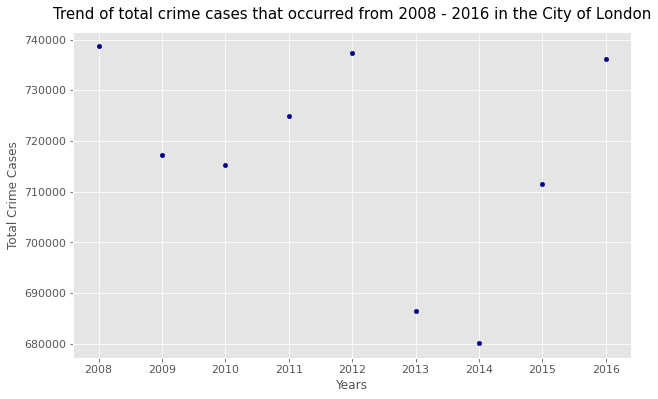

In [31]:
# Membuat dataframe baru
df_scap2 = pd.DataFrame(df_locb.groupby(['Year'], axis=0).sum())

# Mereset index agar kembali seperti semula
df_scap2.reset_index(inplace=True)

# Membuat scatter plot
ax = df_scap2.plot(kind='scatter', x='Year', y='Number of Crimes', figsize=(10, 6), color='darkblue')

# Memberikan keterangan pada plot
plt.title('Trend of total crime cases that occurred from 2008 - 2016 in the City of London', fontsize=15, y=1.02)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Total Crime Cases', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Tampilkan scatter plot
plt.show()

### Kesimpulan/Analisis Jawaban
***
Berikut beberapa informasi yang didapat dari scatter plot di atas:
1. Pada scatter plot pertama yang menunjukkan trend jumlah total kasus kejahatan untuk major category dari kategori 'Theft and Handling' dan 'Violence Against the Person' tahun 2008 - 2016, terlihat bahwa jumlah total kasus tertinggi berada antara **290000 - 300000** kasus kategori 'Theft and Handling' dan **220000 - 240000** kasus kategori 'Violence Against the Person'. Sedangkan jumlah total kasus terendah berada antara **300000 - 310000** kasus kategori 'Theft and Handling' dan **di bawah 160000** kasus kategori 'Violence Against the Person'. 
2. Pada scatter plot kedua yang menunjukkan trend total kasus kejahatan yang terjadi dari tahun 2008 - 2016 di Kota London, terlihat bahwa terdapat 3 total kasus tertinggi yang terjadi di tahun 2008, 2012 dan 2016 dengan total kasus antara **730000 - 740000** kasus serta terdapat total kasus terendah yang terjadi di tahun 2014 dengan total kasus antara **680000 - 690000** kasus. Kemudian terlihat juga bahwa terjadi penurunan total kasus dari tahun 2008 - 2009, lalu mengalami kenaikan total kasus dari tahun 2010 - 2012. Kemudian total kasus menurun dari tahun 2013 - 2014, tetapi kembali mengalami kenaikan yang tinggi dari tahun 2014 - 2016 tepatnya di tahun 2015 dan 2016 dengan total kasus kejahatan **di atas 710000** kasus.

## 7. Word Cloud

Pada bagian ini akan melakukan visualisasi data yang ditanyakan dalam Question menggunakan Word Cloud.

**Question**:

1. Bagaimana word cloud yang ditampilkan jika berdasarkan wilayah di kota London?
2. Bagaimana tampilan masking dengan word cloud yang ditampilkan jika berdasarkan wilayah di Kota London?

**Answer Question 1**:

In [32]:
# Tampilkan kolom Minor Category
freq_borough = df_locb['Borough']
freq_borough

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
               ...    
13490599         Brent
13490600    Hillingdon
13490601        Sutton
13490602       Croydon
13490603        Merton
Name: Borough, Length: 13490604, dtype: object

In [33]:
# Menyimpan daftar kolom Borough sebagai file txt
freq_borough = freq_borough.to_csv("./dataset/crime_by_borough.txt", header=None, index=None, sep=' ', mode='a')

# Membuka file
borough = open('./dataset/crime_by_borough.txt','r').read()

In [34]:
# Menghapus stopword yang berlebihan
stopwords = set(STOPWORDS)

In [35]:
# Inisiasi wordcloud
borough_wc = WordCloud(
        background_color='white',
        max_words=1000,
        stopwords=stopwords)

# Generate wordcloud
borough_wc.generate(borough)

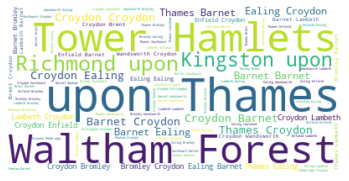

In [36]:
# Tampilkan wordcloud
plt.imshow(borough_wc, interpolation='bilinear');
plt.axis('off');

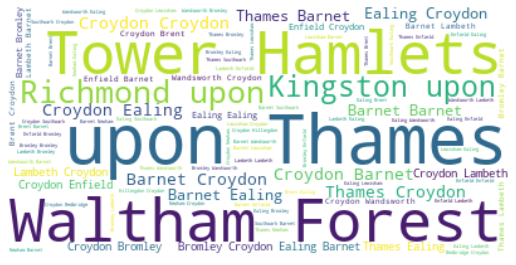

In [37]:
# Tampilkan menggunakan metode fig
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(13)
plt.imshow(borough_wc, interpolation='bilinear');
plt.axis('off');

**Answer Question 2**:

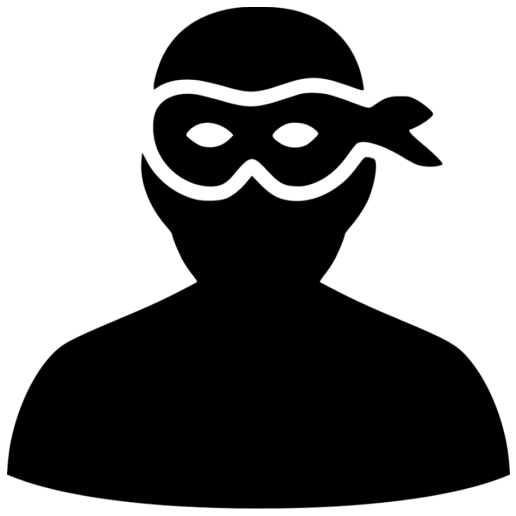

In [38]:
# Masking
# Membuka file png untuk masking
man = np.array(Image.open("./dataset/stealman.png"))

# Mengatur dan tampilkan gambar yang telah disiapkan untuk masking
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(13)

# Tampilkan gambar
plt.imshow(man, cmap=plt.cm.gray, interpolation='bilinear');
plt.axis('off');

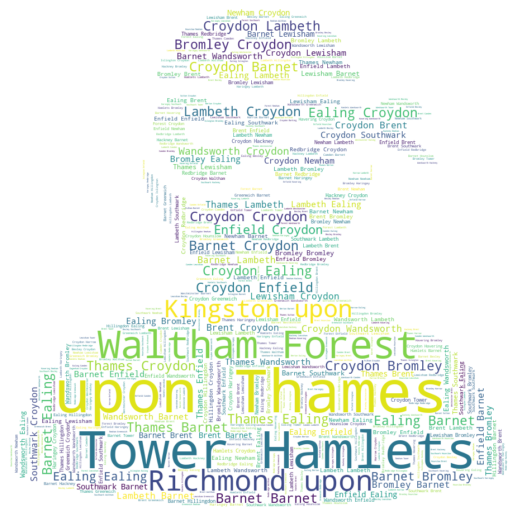

In [39]:
# Inisiasi wordcloud
borough_wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1000,
    mask=man
)

# Generate wordcloud
borough_wc.generate(borough)

# Mengatur dan tampilkan gambar yang telah disiapkan untuk masking
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(13)

# Tampilkan wordcloud setelah masking
plt.imshow(borough_wc, interpolation='bilinear');
plt.axis('off');

### Kesimpulan/Analisis Jawaban
***
Dari tampilan wordcloud diatas terlihat bahwa terdapat 3 wilayah/borough yang tercetak dengan huruf yang lebih besar dibandingkan dengan yang lain. 3 wilayah tersebut ialah upon Thames, Tower Hamlets dan Waltham Forest. Sehingga dapat disimpulkan bahwa 3 wilayah tersebut muncul karena tingkat kejahatan yang beragam dan banyak terjadi.

## 8. Folium

Pada bagian ini akan melakukan visualisasi data yang ditanyakan dalam Question menggunakan Folium.

**Question**:

Bagaimana tampilan peta kota London dengan zoom start = 9?

**Answer Question**:

In [40]:
# Mengatur latitude dan longitude untuk peta London
london_latitude = 51.509865
london_longitude = -0.118092

# Membuat peta london
london_map = folium.Map(
    location=[london_latitude, london_longitude],
    zoom_start=9
)

# Tampilkan peta London
london_map

### Kesimpulan/Analisis Jawaban
***
Folium map di atas menunjukkan tampilan peta kota London dengan zoom start = 9. Pada bagian ini saya tidak dapat membuat tanda/marker karena dalam dataset London Crime tidak terdapat latitude dan longitude untuk setiap wilayah di Kota London.

# E. Overall Analysis
***
Pada tahap ini, saya akan merangkum hasil keseluruhan analisis yang telah saya lakukan. Berikut hasil keseluruhan analisis di atas: <br>
- Hasil analisis total kasus kejahatan pada wilayah/borough di Kota London:
1. Terdapat 12 jumlah wilayah dengan jumlah kasus antara **17878 - 23785** dimana jumlah wilayah ini merupakan yang tertinggi. Kemudian terdapat 1 wilayah dengan jumlah kasus terendah antara **157 - 6064** dan terdapat 1 wilayah juga dengan jumlah kasus tertinggi antara **53319 - 59226**.
2. Range jumlah kasus kejahatan yang terjadi setiap tahunnya memiliki range yang mirip, kecuali 2012 karena lebih tersebar dibandingkan tahun yang lain. Terlihat juga rata-rata total kasus kejahatan yang terjadi untuk setiap wilayah berada antara **23.000 - 26.000an** kasus di setiap tahunnya. Lalu dari semua box plot di atas terlihat adanya outlier yang muncul karena adanya total kasus kejahatan dengan nilai yang ekstrim.
3. Terdapat 3 total kasus tertinggi yang terjadi di tahun 2008, 2012 dan 2016 dengan total kasus antara **730000 - 740000** kasus serta total kasus terendah yang terjadi di tahun 2014 dengan total kasus antara **680000 - 690000** kasus. Kemudian terlihat juga bahwa terjadi penurunan total kasus dari tahun 2008 - 2009, lalu mengalami kenaikan total kasus dari tahun 2010 - 2012. Kemudian total kasus menurun dari tahun 2013 - 2014, tetapi kembali mengalami kenaikan yang tinggi dari tahun 2014 - 2016 tepatnya di tahun 2015 dan 2016 dengan total kasus kejahatan **di atas 710000** kasus.
4. Dari tampilan wordcloud, terlihat bahwa terdapat 3 wilayah/borough yaitu upon Thames, Tower Hamlets dan Waltham Forest yang tercetak dengan huruf yang lebih besar dibandingkan dengan yang lain dan dapat disimpulkan bahwa 3 wilayah tersebut muncul karena tingkat kejahatan yang beragam dan banyak terjadi.<br>
- Hasil analisis total kasus kejahatan pada Major Category:
1. Pada tahun 2012 kasus 'Theft and Handling' meningkat lalu menurun dari tahun 2012 - 2014 dan kembali meningkat tahun 2014 - 2016. Lalu pada kasus 'Violence Againts the Person' menurun dari tahun 2008 - 2012 tetapi dari tahun 2013 - 2016 meningkat. Sedangkan pada kasus 'Burglary' total kasus tiap tahunnya hampir mirip karena totalnya antara **50000 - 100000** kasus. Kemudian diketahui juga bahwa dari ketiga kategori kejahatan mayor tersebut, 'Theft and Handling' menyumbang paling banyak terhadap total kasus kejahatan yang terjadi di London yang ditandai dengan grafik paling tinggi dan disusul oleh kategori 'Violence Against the Person' kemudian kategori 'Burglary'. 
2. Terdapat 2 kategori dengan presentase jumlah kasus **tertinggi** pada major category, yaitu kategori 'Theft and Handling' dengan persentase **41.3%** lalu diikuti oleh kategori 'Violence Against the Person' dengan persentase **24.2%**. Kemudian terdapat juga 2 kategori dengan presentase jumlah kasus **terendah** pada major category, yaitu kategori 'Sexual Offences' dengan persentase **0.0%** lalu di tempat kedua diikuti oleh kategori 'Fraud or Forgery' dengan persentase **0.1%**.
3. Range jumlah kasus kejahatan 'Theft and Handling' lebih besar daripada kasus 'Violence Against the Person'. Lalu dari kedua box plot di atas terlihat tidak ada outlier.
4. Jumlah total kasus tertinggi berada antara **290000 - 300000** kasus kategori 'Theft and Handling' dan **220000 - 240000** kasus kategori 'Violence Against the Person'. Sedangkan jumlah total kasus terendah berada antara **300000 - 310000** kasus kategori 'Theft and Handling' dan **di bawah 160000** kasus kategori 'Violence Against the Person'.<br>
- Hasil analisis total kasus kejahatan pada Minor Category, terdapat 3 kategori dengan presentase total kasus kejahatan tertinggi tahun 2008 - 2016 yaitu 'Other Theft', 'Theft From Motor Vehicle' dan 'Burglary in a Dwelling'.<br>
- Folium map di atas menunjukkan tampilan peta kota London dengan zoom start = 9. 

Setelah melakukan semua tahapan di atas, mulai dari install dan import library yang dibutuhkan, preprocessing data hingga visualisasi data, saya dapat memahami alur untuk bisa melakukan visualisasi data dengan baik. Selain itu, saya juga dapat mengasah data storytelling yang saya miliki. Data storytelling adalah kemampuan untuk menjelaskan hasil analisis data yang telah dilakukan oleh data scientist agar mudah dimengerti orang awam. 